### 4. Command Line Question (CLQ)

#### In this question, you should use any command line tools that you know to answer the following questions using the directed and unweighted graph that you have previously created: Citation graph:

#### 1.Is there any node that acts as an important "connector" between the different parts of the graph?</p>

To identify a node that acts as an important 'connector' between different parts of the graph using command line tools, we should follow these steps:

- Identify nodes with multiple connections: Identify nodes that have multiple references, indicating that they might be acting as connectors. We can use the degree centrality metric to quantify the importance of nodes based on their degrees. Nodes with the highest degree centrality are those with the greatest number of connections. Therefore, we can count the number of edges for each node and identify the ones with the highest connectivity(highest number of edges).

- We need to extract the references from the file, count their occurrences, and filter out nodes with more than one reference. It is noteworthy that, based on the TA's permission and due to the complexity of the graph, we can use Python to answer part of the question, which is really complex to address using grep, awk, and sed. In the next cell, the TA's permission can be seen.

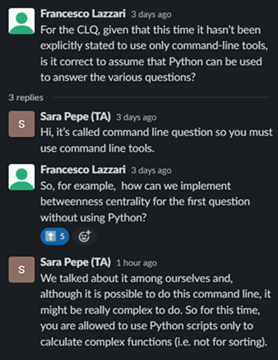

I am implementing this question in Python to verify the process and correctness of the graph alignment with the degree centrality.

In [1]:
import networkx as nx
# extracting the citaion graph generated earlier
graph_path=r'C:\Users\LENOVO\Desktop\UNI\02-ADM\homework5\clq\citation_graph.graphml'
G_citation= nx.read_graphml(graph_path)

# i used the degree_centrality here to check my nodes' degree
degree_centrality = nx.degree_centrality(G_citation)

# printing the top 10 of nodes with the highest degrees(or edges)
top_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]
top_nodes

['2076063813',
 '2151103935',
 '1791587663',
 '2156909104',
 '1639032689',
 '2161969291',
 '2041404167',
 '2117539524',
 '2159080219',
 '2072128103']

In [ ]:
#!/bin/bash

# Set the path to the citation graph file
GRAPH_PATH="C:/Users/LENOVO/Desktop/UNI/02-ADM/homework5/clq/citation_graph.graphml"

echo "###################CLQ question 1 #############################"
# Use Python to read the citation graph and calculate node degrees
NODES_DEGREES=$(python - <<END
import networkx as nx

# Read the citation graph
graph_path=r'C:\Users\LENOVO\Desktop\UNI\02-ADM\homework5\clq\citation_graph.graphml'
G_citation= nx.read_graphml(graph_path)

# Initialize a dictionary to store node degrees
nodes_degree_dic = {}

# Identify edges and calculate node degrees
for node in G_citation.nodes():
    nodes_degree_dic[node] = G_citation.degree(node)

# Convert dictionary items to a list
node_degree_list = [f"{node} {degree}" for node, degree in nodes_degree_dic.items()]

# Print the result
print('\n'.join(node_degree_list))
END
)

# Use grep and sed to extract edges from the Python output
EDGES=$(echo "$NODES_DEGREES" | grep -E '^[0-9]+' | sed 's/\s\+/ /g')

# Use awk to sort the degrees in descending order
SORTED_DEGREES=$(echo "$EDGES" | sort -k2,2nr)

# Use awk to print the top 5 nodes and their degrees
TOP_5_NODES=$(echo "$SORTED_DEGREES" | awk 'NR <= 5')

# Print the result
echo "$TOP_5_NODES" | while read -r node degree; do
  echo "Node ID: $node  >>  Degree: $degree"
done

In [ ]:
'''###################CLQ question 1 #############################
Node ID: 2076063813  >>  Degree: 152
Node ID: 2151103935  >>  Degree: 144
Node ID: 1791587663  >>  Degree: 122
Node ID: 2156909104  >>  Degree: 120
Node ID: 1639032689  >>  Degree: 104
'''

step by step explanation of the code:
- 1.Use Python to Read the Citation Graph and Calculate Node Degrees and store them into the "NODES_DEGREES" variable. NODES_DEGREES=$(python - <<END ... END):Executes a Python script within the Bash script using a here document.The Python script reads the citation graph, calculates node degrees, and prints the result.</p>

- 2.Use grep and sed to Extract Edges from the Python Output:
'EDGES=$(echo "$NODES_DEGREES" | grep -E '^[0-9]+' | sed 's/\s\+/ /g')': Uses 'grep' and 'sed' to extract lines starting with numbers and replaces multiple spaces with a single space.

- 3.Use awk to Sort the Degrees in Descending Order:
'SORTED_DEGREES=$(echo "$EDGES" | sort -k2,2nr)': Sorts the extracted edges based on the second column (degree) in descending order.

- 4.Use awk to Print the Top 5 Nodes and Their Degrees:
'TOP_5_NODES=$(echo "$SORTED_DEGREES" | awk 'NR <= 5')': Uses 'awk' to select the top 5 nodes and their degrees.

- 5.Print the Result:
'echo "$TOP_5_NODES" | while read -r node degree; do ... done': Prints the top 5 nodes and their degrees in the specified format.

#### 2.How does the degree of citation vary among the graph nodes?

In general, The degree of a graph node can varry based on its connectivity within the graph.The way citation degrees vary among graph nodes helps us understand how the graph is connected.
- **High Degree Nodes:** Some nodes may have a significantly higher degree than others. These nodes are often referred to as hubs and play a central role in connecting various parts of the graph. Considering our citation graphs, a paper that is heavily cited might act as a hub connecting different papers.
- **Low-Degree Nodes:** Some nodes may have very few or no connections. These nodes are often isolated from the main structure of the graph and may represent less influential elements. Nodes with fewer citations might mean the papers are not as well-known or are very specific. They're like niche papers, focusing on a particular part of the field and not getting cited as much.
- **Distribution of Degrees:** The number of citations can be very different for each node. In some graphs, a few nodes get cited a lot more than others. In other graphs, citations are more evenly spread out.
- **Graph Connectivity:** The degree distribution often reflects the connectivity and structure of the graph. In a highly connected graph, there might be fewer nodes with extremely high degrees, while in a sparser graph, the degrees might be more evenly distributed

In [ ]:
echo "###################CLQ question 2 #############################"

# Process the output using grep, awk, or sed
sum_of_edges=$(echo "$NODES_DEGREES" | awk '{sum += $2} END {print sum/2}')

# Count lines to get the number of nodes
sum_of_nodes=$(echo "$NODES_DEGREES" | wc -l)

# Calculate the average degree for each node with floating-point precision using awk
avg_degree_info=$(awk -v sum_of_edges="$sum_of_edges" -v sum_of_nodes="$sum_of_nodes" 'BEGIN {printf "%.4f", sum_of_edges / sum_of_nodes}')

# Print the results
echo "Sum of edges: $sum_of_edges"
echo "Sum of nodes: $sum_of_nodes"
echo "Average degree for each node: $avg_degree_info"

In [ ]:
'''###################CLQ question 2 #############################
Sum of edges: 52252
Sum of nodes: 10000
Average degree for each node: 5.2252
'''

#### 3.What is the average length of the shortest path among nodes?
While working on the citation graph for this question, I encountered an error after several attempts indicating that the 'Citation Graph is not strongly connected.' Subsequently, I opted to choose a subgraph in which all nodes are connected, and the best option was to work with the largest component of the citation graph. I extracted the subgraph centered around the most connected node. Due to the intricate nature of graph traversal algorithms, they are not well-suited for efficient implementation in shell scripts, particularly for algorithms like BFS. Therefore, I used Python syntax in the shell code.

In [3]:
echo "###################CLQ question 3 #############################"
python -c '

import networkx as nx

# Read the citation graph
graph_path = r"C:\\Users\\LENOVO\\Desktop\\UNI\\02-ADM\\homework5\\clq\\citation_graph.graphml"
G_citation= nx.read_graphml(graph_path)

# Calculate degree centrality for each node
degree_centrality = nx.degree_centrality(G_citation)

# Find the node with the highest degree centrality
most_connected_node = max(degree_centrality, key=degree_centrality.get)

# Extract the subgraph centered around the most connected node
subgraph = nx.ego_graph(G_citation, most_connected_node)

# Print information about the most connected subgraph
print("Most Connected Node:", most_connected_node)
print("Degree Centrality:", degree_centrality[most_connected_node])
print("Number of Nodes in Subgraph:", subgraph.number_of_nodes())
print("Number of Edges in Subgraph:", subgraph.number_of_edges())


# Calculate the shortest path lengths between all pairs of nodes in the subgraph
shortest_path_lengths = []

for source in subgraph.nodes():
    for target in subgraph.nodes():
        if source != target:
            try:
                length = nx.shortest_path_length(subgraph, source=source, target=target)
                shortest_path_lengths.append(length)
            except nx.NetworkXNoPath:
                pass  # Skip pairs with no path
            

# Sum up all the path lengths
sum_of_path_lengths = sum(shortest_path_lengths)

# Calculate the average length of the shortest path
num_pairs_with_path = len(shortest_path_lengths)
average_shortest_path_length = sum_of_path_lengths / num_pairs_with_path if num_pairs_with_path > 0 else 0

print("Average Length of the Shortest Path Among Nodes:", average_shortest_path_length)
'

Most Connected Node: 2076063813
Degree Centrality: 0.015201520152015202
Number of Nodes in Subgraph: 153
Number of Edges in Subgraph: 589
Average Length of the Shortest Path Among Nodes: 2.742232451093211


In [ ]:
'''###################CLQ question 3 #############################
Most Connected Node: 2076063813
Degree Centrality: 0.015201520152015202
Number of Nodes in Subgraph: 153
Number of Edges in Subgraph: 589
Average Length of the Shortest Path Among Nodes: 2.742232451093211
'''

I intend to depict the largest component of the citation graph that I utilized for CLQ Question 3.

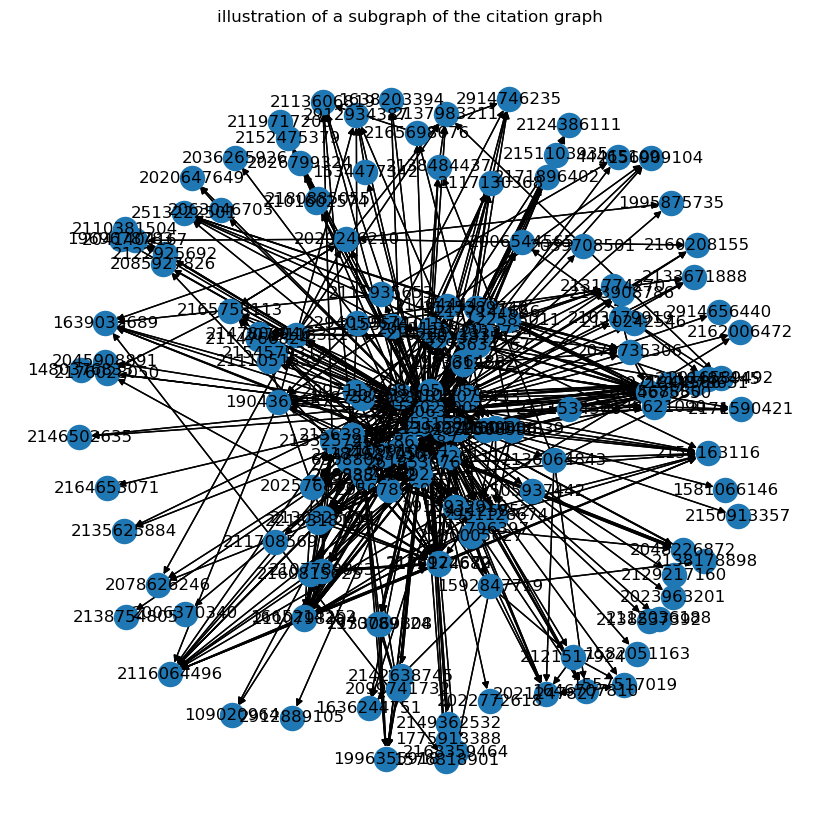

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
# Generating a subgraph of nodes for illustration purposes.
position = nx.spring_layout(subgraph)
plt.figure(figsize=(8,8))
nx.draw(subgraph, with_labels=True, pos= position)
nx.draw_networkx_edges(subgraph, pos=position)
plt.title('illustration of a subgraph of the citation graph')
plt.show()

#### Output screenshot in the notebook:
Please note that, due to the large number of nodes with low degrees, I excluded printing them in my script.

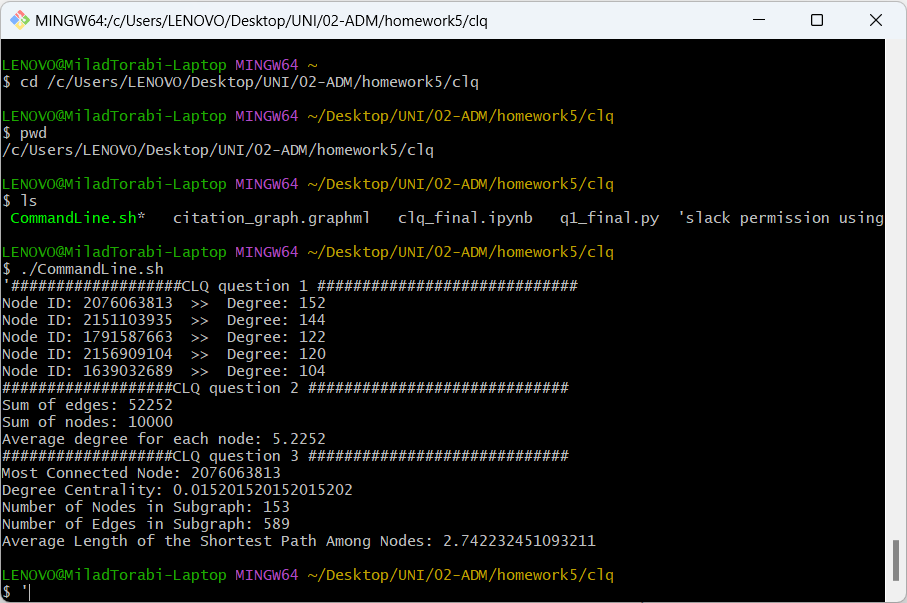